### Controller Demo

In [8]:
%matplotlib inline

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [11]:
sys.path.append('../codes')

In [12]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [13]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [14]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000


### Generate some chemicals

In [15]:
chemicals = ChemicalCreator(ps, chromatograms)

In [16]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, 'Unknown', 'Empirical', None, False)

UnknownChemical mz=224.5023 rt=581.44 max_intensity=1146142.80
[ 347314.46875  423202.5625   409317.15625  637440.6875   563085.5625
  643898.75     738344.3125  1101818.25     709692.875    543573.3125
  410814.375    349194.34375  220751.375  ]


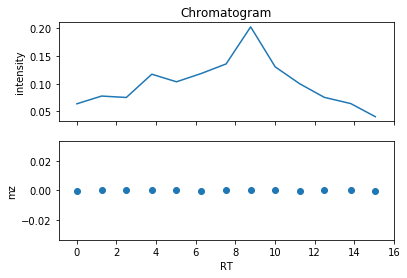

UnknownChemical mz=103.9767 rt=957.44 max_intensity=686301.32
[13318.23730469 14837.359375   29128.74414062 35576.32421875
 26058.55078125  6833.81933594 17234.90234375  9371.08300781]


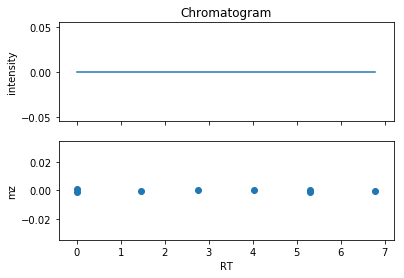

UnknownChemical mz=255.0005 rt=796.16 max_intensity=2750360.56
[128713.9140625  116034.8828125  105636.5078125   98339.65625
 123411.6015625  137262.015625   238222.84375    111821.671875
  49534.36328125  24880.17773438  21141.66210938  29510.265625
  36406.8046875 ]


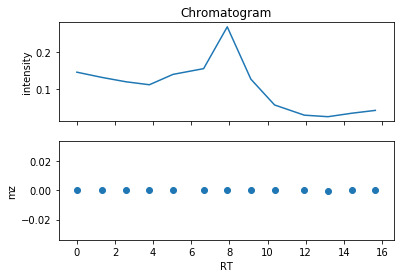

UnknownChemical mz=124.8886 rt=917.13 max_intensity=481154.14
[300698.90625    202362.28125    163895.3125     228360.765625
 192230.5        156264.0625     139824.5        119839.578125
  75143.9296875   61173.2265625  130685.65625    126048.4453125
 135471.140625   147968.203125    90294.984375    62470.46484375
 111133.1171875  122656.953125   105704.78125     60140.9609375
 108967.21875     42684.1875      51020.68359375  56754.01953125]


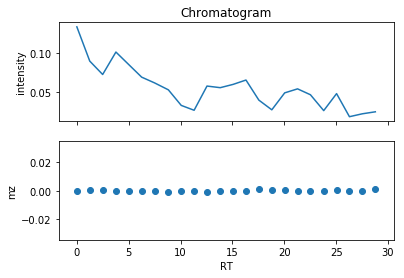

UnknownChemical mz=200.4038 rt=975.06 max_intensity=2282538.57
[ 62913.37109375 109057.609375   145720.390625   121765.8046875
 184102.859375   162070.234375   188105.75       230442.625
 216935.53125    209501.921875   209872.703125  ]


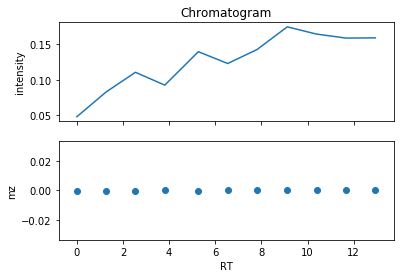

UnknownChemical mz=160.9771 rt=762.96 max_intensity=1133925.37
[ 97612.8828125  102393.9453125  109012.953125   148168.296875
  40857.69140625  52497.        ]


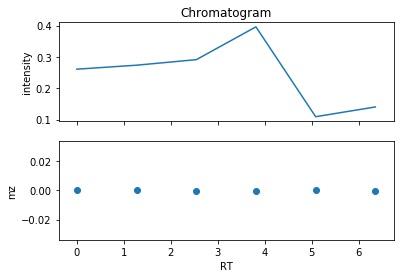

UnknownChemical mz=161.0420 rt=365.13 max_intensity=306662.87
[27823.95117188 88236.078125   28135.8359375  15322.87988281
 63086.125      47797.38671875 17994.40039062 33468.7109375 ]


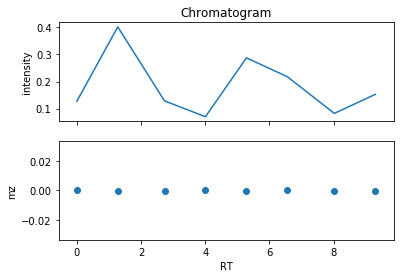

UnknownChemical mz=235.1795 rt=389.00 max_intensity=2369677.45
[96672.21875    23300.83984375 99551.4453125  69364.375
 19163.11328125]


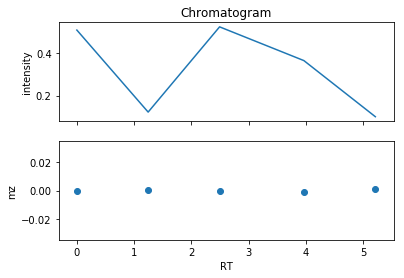

UnknownChemical mz=303.6346 rt=795.99 max_intensity=1055517.18
[31058.43359375 29599.19140625 49915.15625    43291.7734375
 86788.0546875  85119.125      34770.59765625 33540.9296875
 18887.71875   ]


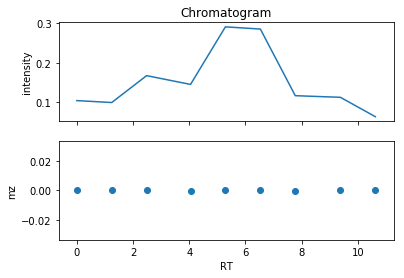

UnknownChemical mz=344.7299 rt=544.88 max_intensity=455105.99
[ 225045.5625   343815.5625   376391.71875  641189.25     779587.375
  808376.5     1084846.25    1107071.125   1554613.75    1560490.
 1308224.5     1238197.25    1352879.125  ]


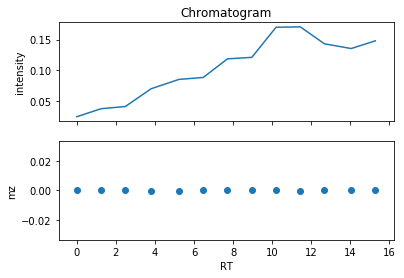

In [17]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [18]:
max_rt = 185
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.run(max_rt)

Acquisition open
Acquisition closing


KeyError: ('scan_duration', 1)

### Set up a Top-N controller

In [ ]:
max_rt = 200                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)

In [ ]:
controller.write_mzML('my_analysis', '../models/out.mzML')